In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

## Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. For this, we will use the "Bee or Wasp?" dataset that was obtained from Kaggle and slightly rebuilt.
- https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp

You can download the dataset for this homework from here:
- https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

- wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
- unzip data.zip

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

Note: you will need an environment with a GPU for this homework. We recommend to use Saturn Cloud. You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps.

The dataset contains separate folders for training and test sets.

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D): 
    https://keras.io/api/layers/convolution_layers/convolution2d/
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    https://keras.io/api/layers/pooling_layers/max_pooling2d/
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
    https://keras.io/api/layers/reshaping_layers/flatten/
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case

- As optimizer use SGD with the following parameters:
    https://keras.io/api/optimizers/sgd/
    - SGD(lr=0.002, momentum=0.8)

For clarification about kernel size and max pooling, check Office Hours.
https://www.youtube.com/watch?v=1WRgdBTUaAc

In [94]:
tf.__version__

'2.14.0'

In [95]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

    Note: since we specify an activation for the output layer, we don't need to set from_logits=True

In [108]:
# compile the model
sgd = SGD(learning_rate=0.002, momentum=0.8)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

- 1
- 65
- 896
- 11214912

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

## Generators and Training
For the next two questions, use the following data generator for both train and test sets:

ImageDataGenerator(rescale=1./255)

   - We don't need to do any additional pre-processing for the images.
   - When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
   - Use batch_size=20
   - Use shuffle=True for both training and test sets.

For training use .fit() with the following params:

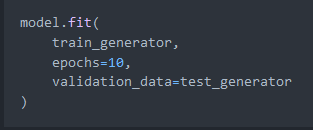

In [98]:
train_gen = ImageDataGenerator(rescale=1./225)

In [109]:
train_ds = train_gen.flow_from_directory('./data/data/train',
                                        target_size=(150,150),
                                        batch_size=20,
                                        shuffle=True,
                                        class_mode='binary')

Found 3677 images belonging to 2 classes.


In [110]:
test_gen = ImageDataGenerator(rescale=1./225)
test_ds = test_gen.flow_from_directory('./data/data/test',
                                        target_size=(150,150),
                                        batch_size=20,
                                        shuffle=True,
                                      class_mode='binary')

Found 918 images belonging to 2 classes.


In [111]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [112]:
test_ds.class_indices

{'bee': 0, 'wasp': 1}

In [113]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 25s 136ms/step - loss: 0.6807 - accuracy: 0.5572 - val_loss: 0.6377 - val_accuracy: 0.6122
Epoch 2/10
184/184 [==============================] - 24s 132ms/step - loss: 0.6456 - accuracy: 0.6212 - val_loss: 0.6189 - val_accuracy: 0.6394
Epoch 3/10
184/184 [==============================] - 25s 137ms/step - loss: 0.5909 - accuracy: 0.6834 - val_loss: 0.6177 - val_accuracy: 0.6580
Epoch 4/10
184/184 [==============================] - 25s 135ms/step - loss: 0.5528 - accuracy: 0.7212 - val_loss: 0.5451 - val_accuracy: 0.7255
Epoch 5/10
184/184 [==============================] - 25s 133ms/step - loss: 0.5148 - accuracy: 0.7495 - val_loss: 0.5651 - val_accuracy: 0.7168
Epoch 6/10
184/184 [==============================] - 25s 134ms/step - loss: 0.4966 - accuracy: 0.7680 - val_loss: 0.5474 - val_accuracy: 0.7222
Epoch 7/10
184/184 [==============================] - 24s 131ms/step - loss: 0.4664 - accuracy: 0.7871 - val_loss: 0.5183 - val_ac

In [114]:
train_acc = history.history['accuracy']

### Question 3

What is the median of training accuracy for all the epochs for this model?

    0.20
    0.40
    0.60
    0.80

In [120]:
np.median(train_acc)

0.7587707340717316

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

    0.031
    0.061
    0.091
    0.131


In [122]:
np.std(history.history['loss'])

0.09604819541004547

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'


In [129]:
train_gen = ImageDataGenerator(rescale=1./225,
                              rotation_range=50,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [130]:
train_ds = train_gen.flow_from_directory('./data/data/train',
                                        target_size=(150,150),
                                        batch_size=20,
                                        shuffle=True,
                                        class_mode='binary')

Found 3677 images belonging to 2 classes.


In [132]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 36s 197ms/step - loss: 0.4884 - accuracy: 0.7718 - val_loss: 0.4872 - val_accuracy: 0.7680
Epoch 2/10
184/184 [==============================] - 35s 192ms/step - loss: 0.4885 - accuracy: 0.7756 - val_loss: 0.4857 - val_accuracy: 0.7756
Epoch 3/10
184/184 [==============================] - 35s 192ms/step - loss: 0.4801 - accuracy: 0.7751 - val_loss: 0.4940 - val_accuracy: 0.7712
Epoch 4/10
184/184 [==============================] - 35s 192ms/step - loss: 0.4706 - accuracy: 0.7903 - val_loss: 0.4587 - val_accuracy: 0.7810
Epoch 5/10
184/184 [==============================] - 35s 192ms/step - loss: 0.4706 - accuracy: 0.7797 - val_loss: 0.4920 - val_accuracy: 0.7767
Epoch 6/10
184/184 [==============================] - 35s 192ms/step - loss: 0.4633 - accuracy: 0.7968 - val_loss: 0.4646 - val_accuracy: 0.8017
Epoch 7/10
184/184 [==============================] - 35s 192ms/step - loss: 0.4690 - accuracy: 0.7879 - val_loss: 0.4518 - val_ac

### Question 5

Let's train our model for 10 more epochs using the same code as previously.

    Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

    0.18
    0.48
    0.78
    0.108


In [133]:
np.mean(history.history['val_loss'])

0.48369751274585726

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

    0.38
    0.58
    0.78
    0.98

In [134]:
e6_10 = history.history['val_accuracy']
e6_10 = e6_10[5:]
np.mean(e6_10)

0.7834422707557678